In [2]:
# Import libraries and define required functions
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sea

def predict(X, w):
  return X * w

def loss(X, Y, w):
  return np.average((predict(X, w) - Y) ** 2)

In [3]:
# Load data from pizza.txt
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

In [4]:
# Train
# calculate the correct (or closest possible?) weight from the values in X and Y

# iterations = max number of iterations to determine the weight
# lr = learning rate (step size)
def train(X, Y, iterations, lr) -> float:
  # starting weight
  w = 0
  for i in range(iterations):
    current_loss = loss(X, Y, w)
    print("Iteration %4d => Weight: %.6f => Loss: %.6f" % (i, w, current_loss))

    # does adding a step to w reduce the loss?
    if loss(X, Y, w + lr) < current_loss:
      w += lr
    # does subtracting a step from w reduce the loss?
    elif loss(X, Y, w - lr) < current_loss:
      w -= lr
    # if a step in neither direction doesn't improve the loss, return the closest weight we can
    else:
      return w
  
  raise Exception("Couldn't converge within %4d iterations" % iterations)

In [5]:
# Train the system
max_iterations = 10_000
learning_rate = 0.01
got_weight = train(X, Y, max_iterations, learning_rate)
print("Resulting weight:", got_weight)

Iteration    0 => Weight: 0.000000 => Loss: 812.866667
Iteration    1 => Weight: 0.010000 => Loss: 804.820547
Iteration    2 => Weight: 0.020000 => Loss: 796.818187
Iteration    3 => Weight: 0.030000 => Loss: 788.859587
Iteration    4 => Weight: 0.040000 => Loss: 780.944747
Iteration    5 => Weight: 0.050000 => Loss: 773.073667
Iteration    6 => Weight: 0.060000 => Loss: 765.246347
Iteration    7 => Weight: 0.070000 => Loss: 757.462787
Iteration    8 => Weight: 0.080000 => Loss: 749.722987
Iteration    9 => Weight: 0.090000 => Loss: 742.026947
Iteration   10 => Weight: 0.100000 => Loss: 734.374667
Iteration   11 => Weight: 0.110000 => Loss: 726.766147
Iteration   12 => Weight: 0.120000 => Loss: 719.201387
Iteration   13 => Weight: 0.130000 => Loss: 711.680387
Iteration   14 => Weight: 0.140000 => Loss: 704.203147
Iteration   15 => Weight: 0.150000 => Loss: 696.769667
Iteration   16 => Weight: 0.160000 => Loss: 689.379947
Iteration   17 => Weight: 0.170000 => Loss: 682.033987
Iteration 

In [6]:
# Predict the number of pizzas
reservations = 20
print("Prediction: x=%d => y=%.2f" % (reservations, predict(20, got_weight)))

Prediction: x=20 => y=36.80


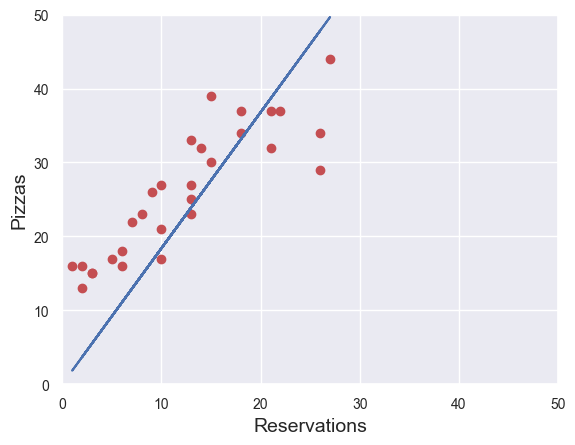

In [8]:
# Plot the graph with the learned weight
sea.set_theme()
plt.axis([0, 50, 0, 50])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Reservations", fontsize=14)
plt.ylabel("Pizzas", fontsize=14)
plt.plot(X, Y, "ro")
plt.plot(X, predict(X, got_weight))
# plt.show()